# Image Quality Assessment And Prediction of Image Quality, A OpenCV, skikit-image, BRISQUE combined approach.

In [283]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt             
%matplotlib inline
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [284]:
df= pd.read_csv('/content/datasetV2.csv')
df.head()

,image,type,brightness,contrast,blurrness,sharpness,noise,text_ratio,width,height,artifacts
0,An-example-of-blurry-images_Q640.jpg,0,0.716012,0.670523,100.000000,6.785205,0.103363,10.282814,640,640,0.161135
1,antique-grungy-french-invoice-receipt-cherub-g...,0,0.868586,0.811852,100.000000,16.094172,1.000000,0.203851,719,900,0.086727
2,Delhi_to_Office_DL-20-STF-30025_-_By_Road_Y8zQ...,0,0.972642,0.974531,11.019122,1.001927,0.001829,0.071625,1712,2378,0.080253
3,download.jpeg,0,0.706174,0.671694,100.000000,34.209581,0.955788,7.824965,301,167,0.137682
4,eb6ot1go_1986-bullet-bill_625x300_01_January_2...,0,0.869724,0.858001,100.000000,17.522551,0.998939,0.098471,650,767,0.066694


In [285]:
df.describe()

,type,brightness,contrast,blurrness,sharpness,noise,text_ratio,width,height,artifacts
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,187.000000,189.000000,189.000000,189.000000
mean,1.708995,0.869317,0.885599,94.620494,20.442874,0.171830,27.708053,989.111111,1223.354497,0.150874
std,1.187243,0.159707,0.142474,20.365954,14.087296,0.290803,354.827725,580.992056,777.214623,0.178592
min,0.000000,0.218116,0.329836,5.294865,0.499029,0.000000,0.002514,166.000000,167.000000,0.002514
25%,1.000000,0.869724,0.891961,100.000000,11.543743,0.000008,0.061118,585.000000,666.000000,0.053020
50%,2.000000,0.934592,0.943716,100.000000,17.978914,0.044776,0.094854,700.000000,856.000000,0.081176
75%,3.000000,0.957303,0.966843,100.000000,26.973159,0.162449,0.226382,1630.000000,1920.000000,0.158808
max,3.000000,0.995737,0.996700,100.000000,87.797695,1.000000,4852.333333,3072.000000,4128.000000,0.920041


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       189 non-null    object 
 1   type        189 non-null    int64  
 2   brightness  189 non-null    float64
 3   contrast    189 non-null    float64
 4   blurrness   189 non-null    float64
 5   sharpness   189 non-null    float64
 6   noise       189 non-null    float64
 7   text_ratio  187 non-null    float64
 8   width       189 non-null    int64  
 9   height      189 non-null    int64  
 10  artifacts   189 non-null    float64
dtypes: float64(7), int64(3), object(1)
memory usage: 16.4+ KB


In [287]:
df.shape

(189, 11)

In [288]:
sum(df.duplicated())

0

No duplicates

# EDA: 

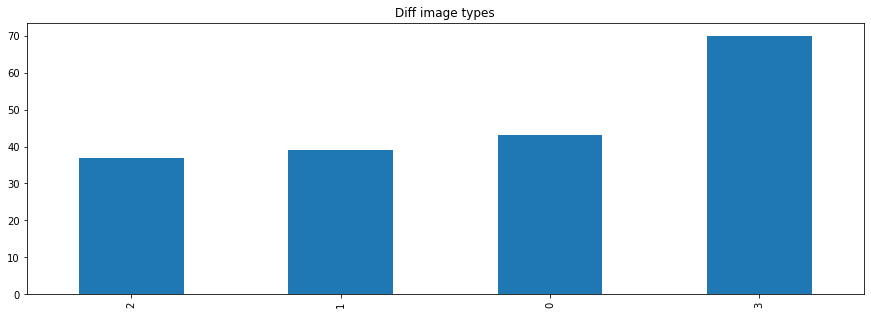

In [289]:
df['type'].value_counts().sort_values().plot(kind="bar", title="Diff image types", figsize=(15,5))
plt.show()

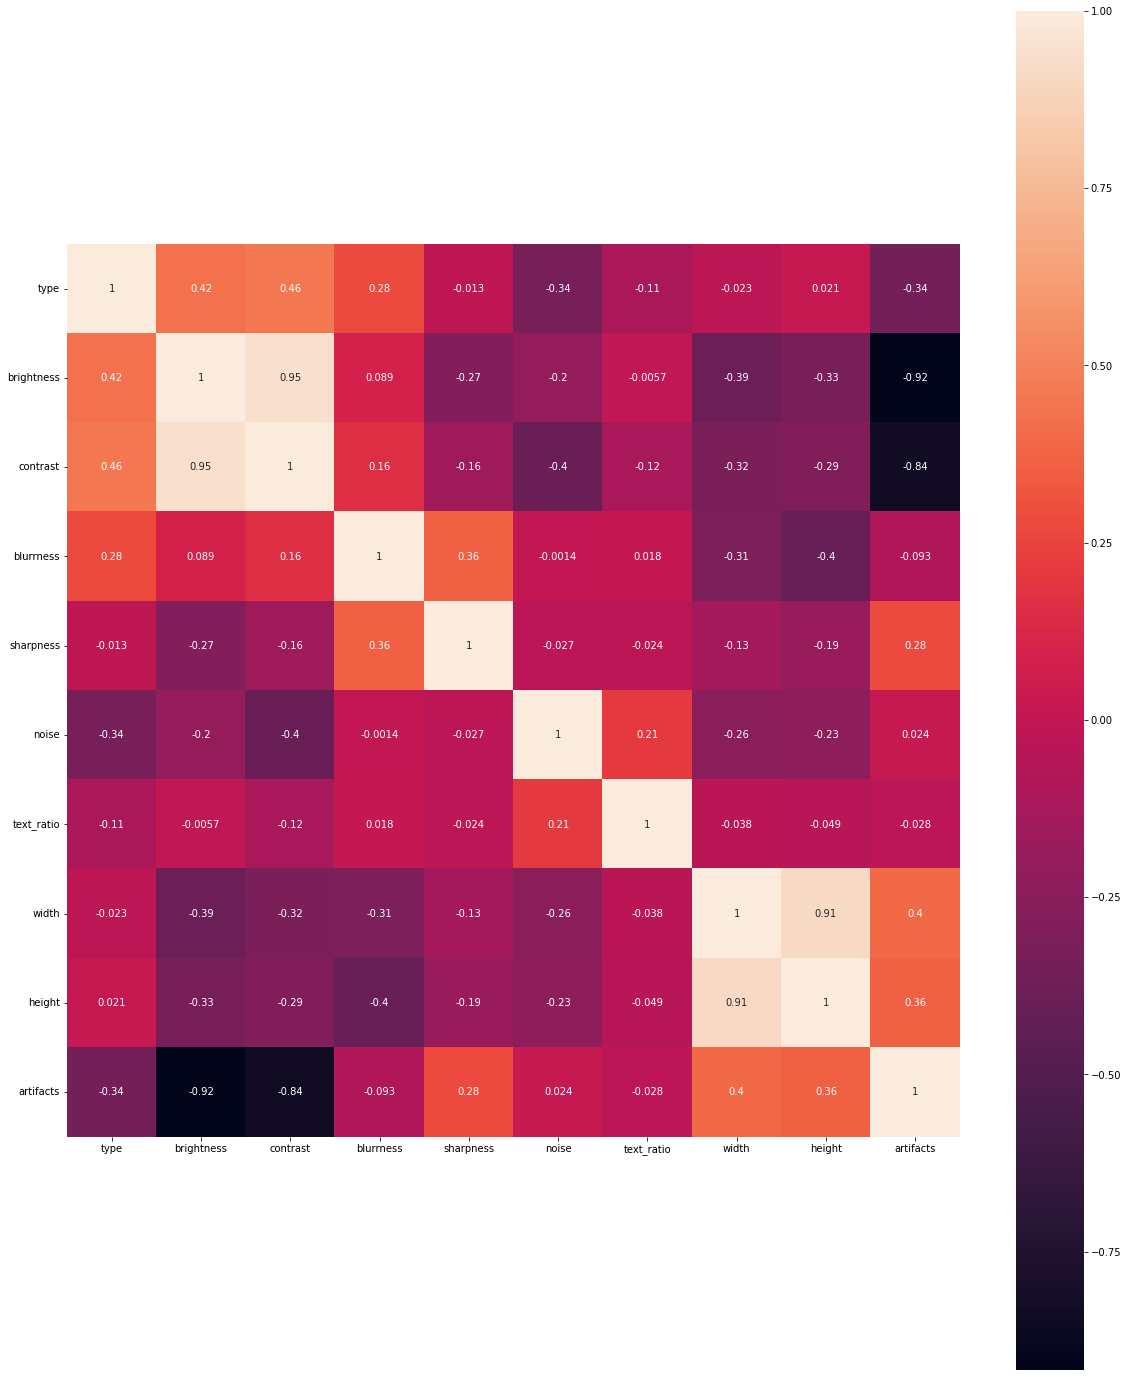

In [290]:
corr= df.corr()
fig,ax= plt.subplots(figsize=(20,25))
sns.heatmap(corr,annot=True, square=True,ax=ax)
plt.yticks(rotation=360)
plt.show()

In [306]:
df = df.drop(['image','sharpness','width'],axis= 1)

KeyError: ignored

In [307]:
df = df.drop(['height'],axis= 1)

In [308]:
df.head()

,type,brightness,contrast,blurrness,noise,text_ratio,artifacts
0,0,0.716012,0.670523,100.000000,0.103363,10.282814,0.161135
1,0,0.868586,0.811852,100.000000,1.000000,0.203851,0.086727
2,0,0.972642,0.974531,11.019122,0.001829,0.071625,0.080253
3,0,0.706174,0.671694,100.000000,0.955788,7.824965,0.137682
4,0,0.869724,0.858001,100.000000,0.998939,0.098471,0.066694


In [309]:
df.shape  # 8 features not including brisque

(189, 7)

In [321]:
df= df.fillna(0)

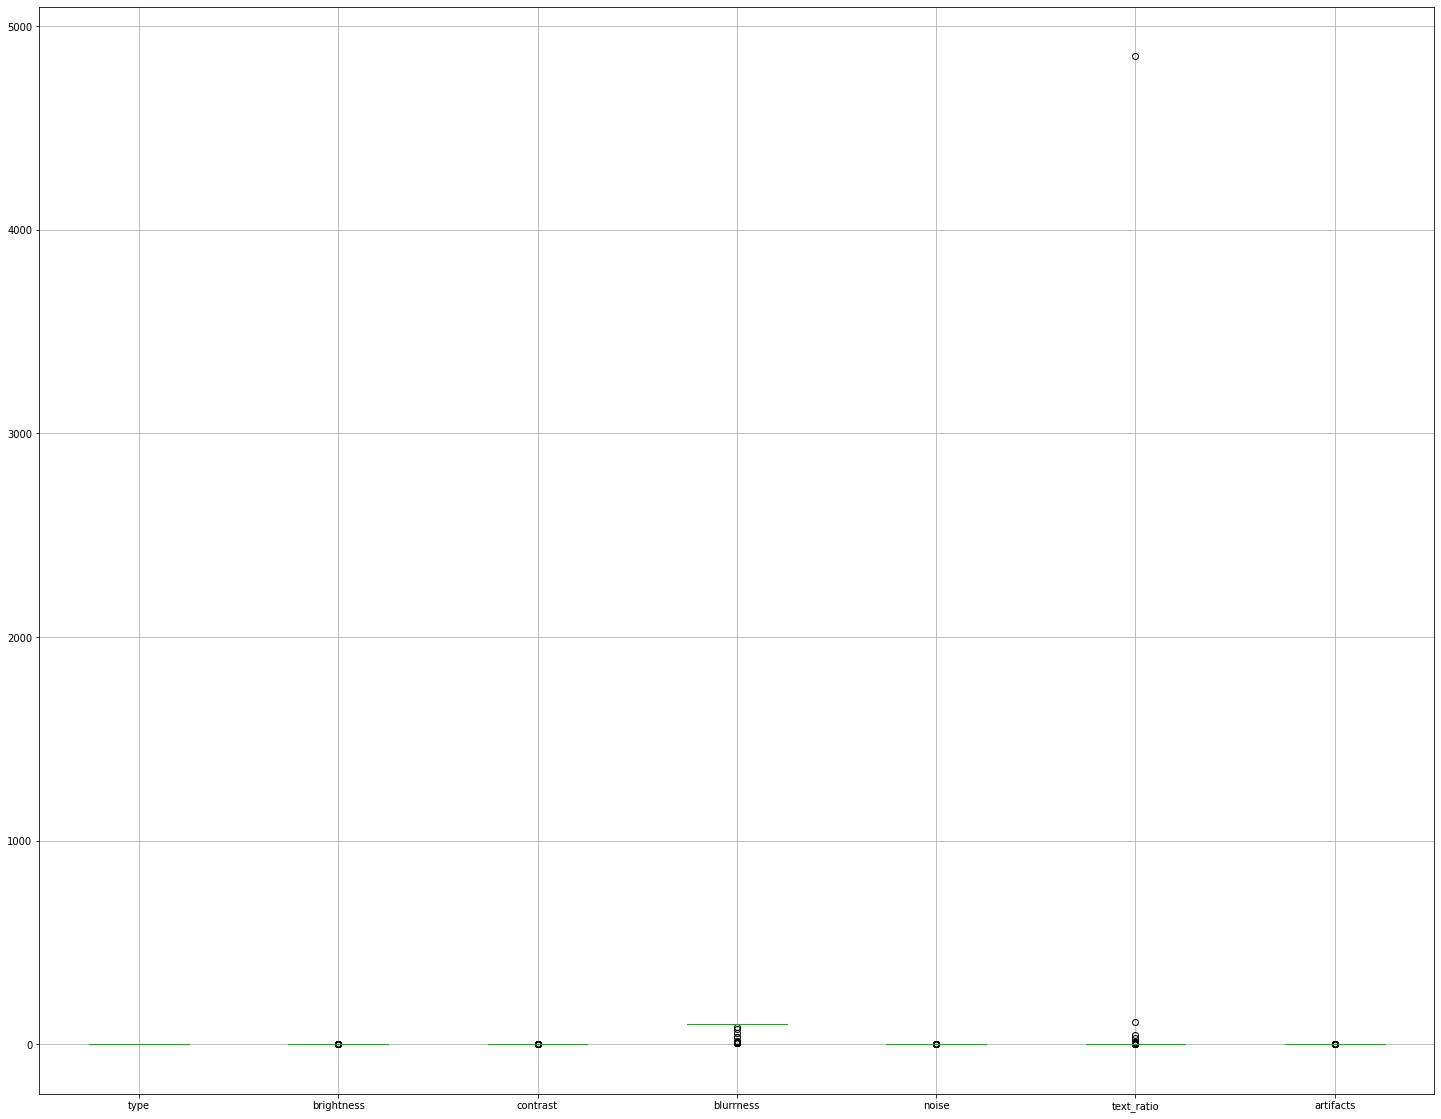

In [310]:
df.boxplot(figsize=(25,20))

In [322]:
x= df.drop(['type'],axis=1)
y= df['type']

In [323]:
y

0      0
1      0
2      0
3      0
4      0
      ..
184    3
185    3
186    3
187    3
188    3
Name: type, Length: 189, dtype: int64

In [324]:
y.unique()

array([0, 1, 2, 3])

In [314]:
df['type']

0      0
1      0
2      0
3      0
4      0
      ..
184    3
185    3
186    3
187    3
188    3
Name: type, Length: 189, dtype: int64

In [ ]:
# df['type_sc'] = df['type'].replace([0,1,2,3], [0,0.25,0.75,1.0])


# df['type_sc'].values


array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75, 0.75,
       0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  ])

In [ ]:
# y= df['type_sc']

In [ ]:
# df=df.drop(['type_scl'],axis=1)

In [325]:
y.unique()

array([0, 1, 2, 3])

In [326]:
x.columns

Index(['brightness', 'contrast', 'blurrness', 'noise', 'text_ratio',
       'artifacts'],
      dtype='object')

In [327]:
feature_name=['image', 'brightness', 'contrast', 'blurrness', 'noise', 'text_ratio',
       'width', 'height', 'artifacts']

In [328]:
target_name=['type']

In [329]:
x=x.drop(['contrast'],axis=1)

In [330]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x, y, stratify=y, test_size = 0.3)

In [319]:
df=df.fillna(0)

In [331]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [332]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_predict_train_logreg = logreg.predict(X_train)
y_predict_test_logreg = logreg.predict(X_test)

train_accuracy_score_logreg = accuracy_score(y_train, y_predict_train_logreg)
test_accuracy_score_logreg = accuracy_score(y_test, y_predict_test_logreg)

print(train_accuracy_score_logreg)
print(test_accuracy_score_logreg)

0.5
0.47368421052631576


In [333]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x, y, stratify=y, test_size = 0.3)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_predict_train_logreg = logreg.predict(X_train)
y_predict_test_logreg = logreg.predict(X_test)

train_accuracy_score_logreg = accuracy_score(y_train, y_predict_train_logreg)
test_accuracy_score_logreg = accuracy_score(y_test, y_predict_test_logreg)

print(train_accuracy_score_logreg)
print(test_accuracy_score_logreg)

0.5303030303030303
0.47368421052631576


In [334]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Init classifier
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
# preds = xgb_cl.predict(X_test)
y_predict_train_xgb_cl = xgb_cl.predict(X_train)
y_predict_test_xgb_cl = xgb_cl.predict(X_test)
train_accuracy_score_xgb_cl = accuracy_score(y_train, y_predict_train_xgb_cl)
test_accuracy_score_xgb_cl= accuracy_score(y_test, y_predict_test_xgb_cl)

print(train_accuracy_score_xgb_cl)
print(test_accuracy_score_xgb_cl)

0.9696969696969697
0.47368421052631576


In [335]:
param_grid = {
    "max_depth": [2,3, 4, 5,6, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
grid_cv.fit(x, y)

In [ ]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Init classifier
xgb_cl = xgb.XGBClassifier(colsample_bytree= 0.5, gamma= 0, learning_rate= 0.1, max_depth= 2, reg_lambda= 0, scale_pos_weight= 1, subsample= 0.8)

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
# preds = xgb_cl.predict(X_test)
y_predict_train_xgb_cl = xgb_cl.predict(X_train)
y_predict_test_xgb_cl = xgb_cl.predict(X_test)
train_accuracy_score_xgb_cl = accuracy_score(y_train, y_predict_train_xgb_cl)
test_accuracy_score_xgb_cl= accuracy_score(y_test, y_predict_test_xgb_cl)

print(train_accuracy_score_xgb_cl)
print(test_accuracy_score_xgb_cl)

1.0
0.5238095238095238


In [337]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x, y, stratify=y, test_size = 0.3)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_predict_train_logreg = logreg.predict(X_train)
y_predict_test_logreg = logreg.predict(X_test)

train_accuracy_score_logreg = accuracy_score(y_train, y_predict_train_logreg)
test_accuracy_score_logreg = accuracy_score(y_test, y_predict_test_logreg)

print(train_accuracy_score_logreg)
print(test_accuracy_score_logreg)

0.4772727272727273
0.43859649122807015


In [ ]:
y

0     0
1     0
2     0
3     0
4     0
     ..
64    3
65    3
66    3
67    3
68    3
Name: type, Length: 69, dtype: int64

In [338]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x, y, stratify=y, test_size = 0.3)

In [ ]:
# _train.shape

(48,)

In [339]:
x= df.drop(['contrast'],axis=1)

In [ ]:
x

,brightness,blurrness,noise,text_ratio,width,height,artifacts
0,0.972673,10.210205,0.001797,0.071625,1712,2378,0.080268
1,0.899201,3165.596177,0.000000,0.231318,166,308,0.171118
2,0.944522,2476.508698,0.044659,0.098088,439,560,0.068768
3,0.454826,439.636052,0.890055,29.566625,648,491,0.160270
4,0.420416,4705.595962,0.000000,3.714097,1623,2321,0.784324
...,...,...,...,...,...,...,...
64,0.924605,1634.261817,0.096586,0.141051,909,1025,0.113996
65,0.960897,7543.602275,0.013545,0.046779,998,1438,0.049678
66,0.941633,3776.049877,0.043335,0.097820,730,826,0.081230
67,0.732397,19925.305865,0.267669,0.504386,721,558,0.340256


In [340]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x, y, stratify=y, test_size = 0.3)
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define model
model = LogisticRegression()
# define the ovr strategy
ovr = OneVsRestClassifier(model)
# fit model
ovr.fit(X_train, y_train)
# make predictions
yhat = ovr.predict(X_test)


y_predict_train = ovr.predict(X_train)
y_predict_test = ovr.predict(X_test)

train_accuracy_score = accuracy_score(y_train, y_predict_train)
test_accuracy_score = accuracy_score(y_test, y_predict_test)

print(train_accuracy_score)
print(test_accuracy_score)

0.9696969696969697
0.9473684210526315


In [341]:
import pickle
output = open('pickledmodel1.pkl', 'wb')
pickle.dump(ovr,output)
from google.colab import files
files.download('pickledmodel1.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [356]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x, y, stratify=y, test_size = 0.3)
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define model
model = LogisticRegression()
# define the ovr strategy
ovr = OneVsRestClassifier(model)
# fit model
ovr.fit(X_train, y_train)
# make predictions
yhat = ovr.predict(X_test)


y_predict_train = ovr.predict(X_train)
y_predict_test = ovr.predict(X_test)

train_accuracy_score = accuracy_score(y_train, y_predict_train)
test_accuracy_score = accuracy_score(y_test, y_predict_test)

print(train_accuracy_score)
print(test_accuracy_score)

0.9772727272727273
0.9824561403508771


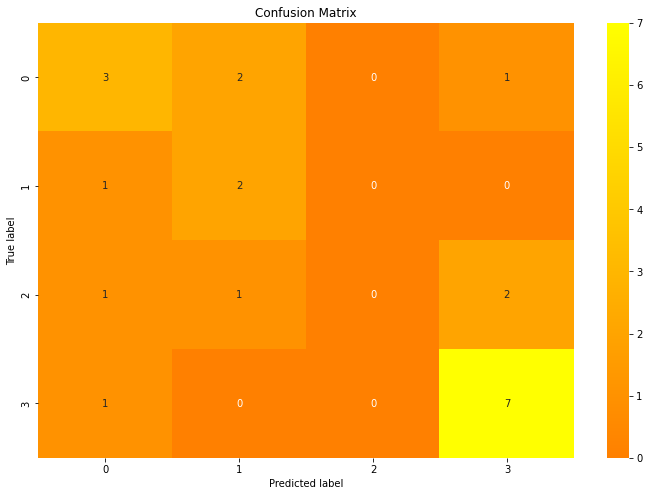

In [ ]:
cm_logreg = confusion_matrix(y_test,y_predict_test_logreg)
draw_confusion_matrix(cm_logreg)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=6, criterion = 'entropy', 
                            min_samples_leaf= 1,min_samples_split= 2)
rf.fit(X_train, y_train)

y_predict_train_rf = rf.predict(X_train)
y_predict_test_rf = rf.predict(X_test)

train_accuracy_score_rf = accuracy_score(y_train, y_predict_train_rf)
test_accuracy_score_rf = accuracy_score(y_test, y_predict_test_rf)

print(train_accuracy_score_rf)
print(test_accuracy_score_rf)

1.0
0.7142857142857143


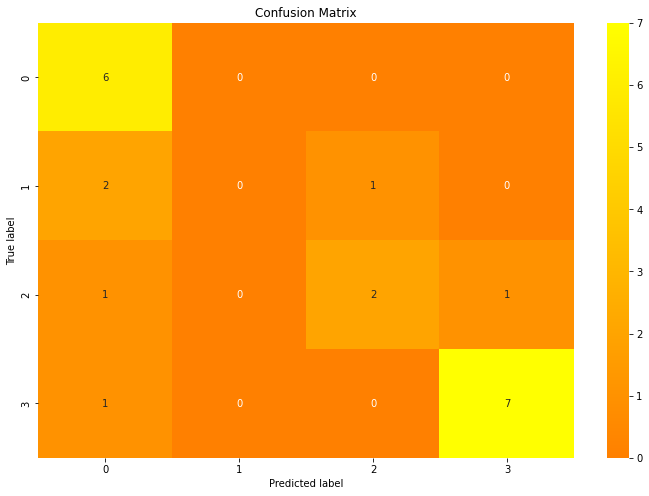

In [ ]:
cm_rf = confusion_matrix(y_test,y_predict_test_rf)
draw_confusion_matrix(cm_rf)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# df=df.drop(['image'],axis=1)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled_df = scaler.fit_transform(df)
# print(scaled_df)
scaled = pd.DataFrame(scaled_df, index=df.index, columns=df.columns)
scaled.head()

,type,brightness,contrast,blurrness,noise,text_ratio,width,height,artifacts
0,0.0,0.970037,0.966757,0.000217,0.001864,0.002338,0.702727,0.951287,0.085143
1,0.0,0.875540,0.866592,0.118587,0.000000,0.007739,0.000000,0.000000,0.184138
2,0.0,0.933830,0.938616,0.092737,0.046308,0.003233,0.124091,0.115809,0.072611
3,0.0,0.304001,0.197579,0.016326,0.922916,1.000000,0.219091,0.084099,0.172318
4,0.0,0.259744,0.295348,0.176359,0.000000,0.125544,0.662273,0.925092,0.852325


In [ ]:
x_scaled=scaled.drop(['type'],axis=1)
y_scaled=scaled['type']

In [ ]:
y_scaled=df['type']
y_scaled

0     0
1     0
2     0
3     0
4     0
     ..
64    3
65    3
66    3
67    3
68    3
Name: type, Length: 69, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier(random_state=3232, n_estimators=50, max_depth=6, criterion = 'entropy', 
                            min_samples_leaf= 1,min_samples_split= 2)
rf.fit(X_train, y_train)

y_predict_train_rf = rf.predict(X_train)
y_predict_test_rf = rf.predict(X_test)

train_accuracy_score_rf = accuracy_score(y_train, y_predict_train_rf)
test_accuracy_score_rf = accuracy_score(y_test, y_predict_test_rf)

print(train_accuracy_score_rf)
print(test_accuracy_score_rf)

1.0
0.47619047619047616


In [ ]:
X1=df['brightness']
y=df['type']

In [ ]:
import numpy
arr = numpy.array(X1)
numpy.reshape(arr, (1, -1))
n2= numpy.reshape(arr, (1, len(arr)))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1, y, stratify=y, test_size = 0.3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier(random_state=1222, n_estimators=50, max_depth=6, criterion = 'entropy', 
                            min_samples_leaf= 1,min_samples_split= 2)
rf.fit(X_train, y_train)

y_predict_train_rf = rf.predict(X_train)
y_predict_test_rf = rf.predict(X_test)

train_accuracy_score_rf = accuracy_score(y_train, y_predict_train_rf)
test_accuracy_score_rf = accuracy_score(y_test, y_predict_test_rf)

print(train_accuracy_score_rf)
print(test_accuracy_score_rf)

ValueError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=54)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

In [ ]:
result= model.predict(X_test)

In [ ]:
result

array([ 0.58203211,  0.55937117, -0.21500882,  0.48280375,  0.40229842,
        0.6093351 ,  0.58329229,  0.57269367,  0.7980765 ,  0.3302133 ,
        0.7152473 ,  0.75926629,  0.66930731,  0.56229885,  0.54358881,
        0.67653687,  0.76455432,  0.62757035,  0.06969162,  0.66700455,
        0.54397   ,  0.55931951,  0.57253463])

In [ ]:
from sklearn import metrics

In [ ]:
%%time
clf=RandomForestClassifier(n_estimators=100,max_depth=2, min_samples_split=5, min_samples_leaf=5)
# clf.predict()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
pip install shap

In [ ]:
# Create a tree explainer
import shap
rf_explainer = shap.TreeExplainer(
    clf, X_train, feature_names=X_train.columns.tolist()
)

print(rf_explainer)

In [ ]:
shap_values_rf = rf_explainer.shap_values(X_train, y_train,approximate=True)
shap_values_rf2=np.array(shap_values_rf)

print(shap_values_rf2.shape)

In [ ]:
shap_values_rf2

In [ ]:
shap_values_rf2 = shap_values_rf2[:, :-1]

shap_df=pd.DataFrame(shap_values_rf2, columns=X_train.columns.tolist()).head()
shap_df

In [ ]:
import shap
shap.initjs()

In [ ]:
%time
samples = X_train

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(samples, approximate=False, check_additivity=False)

shap.summary_plot(shap_values[1], samples)

In [ ]:
def make_shap_waterfall_plot(shap_values, features, num_display=20):
    
    '''
    A function for building a SHAP waterfall plot.
    
    SHAP waterfall plot is used to visualize the most important features in a descending order.
    
    Parameters:
    shap_values (list): SHAP values obtained from a model
    features (pandas DataFrame): a list of features used in a model
    num_display(int): number of features to display
    
    Returns:
    matplotlib.pyplot plot: SHAP waterfall plot
    
    '''
    
    column_list = features.columns
    feature_ratio = (np.abs(shap_values).sum(0) / np.abs(shap_values).sum()) * 100
    column_list = column_list[np.argsort(feature_ratio)[::-1]]
    feature_ratio_order = np.sort(feature_ratio)[::-1]
    cum_sum = np.cumsum(feature_ratio_order)
    column_list = column_list[:num_display]
    feature_ratio_order = feature_ratio_order[:num_display]
    cum_sum = cum_sum[:num_display]
    
    num_height = 0
    if (num_display >= 20) & (len(column_list) >= 20):
        num_height = (len(column_list) - 20) * 0.4
        
    fig, ax1 = plt.subplots(figsize=(8, 8 + num_height))
    ax1.plot(cum_sum[::-1], column_list[::-1], c='blue', marker='o')
    ax2 = ax1.twiny()
    ax2.barh(column_list[::-1], feature_ratio_order[::-1], alpha=0.6)
    
    ax1.grid(True)
    ax2.grid(False)
    ax1.set_xticks(np.arange(0, round(cum_sum.max(), -1)+1, 10))
    ax2.set_xticks(np.arange(0, round(feature_ratio_order.max(), -1)+1, 10))
    ax1.set_xlabel('Cumulative Ratio')
    ax2.set_xlabel('Composition Ratio')
    ax1.tick_params(axis="y", labelsize=13)
    plt.ylim(-1, len(column_list))

In [ ]:
make_shap_waterfall_plot(shap_values[1], samples)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
%%time
# Init classifier
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
print(accuracy_score(y_test, preds))

# Comparison classification models

In [ ]:
RANDOM_STATE = 545
classifiers = [LogisticRegression(max_iter=70, random_state=RANDOM_STATE),
               DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE),
               SVC(C=3, kernel='linear', random_state=RANDOM_STATE),
               RandomForestClassifier(
                   max_depth=10, min_samples_split=5, min_samples_leaf=5, random_state=RANDOM_STATE),
               AdaBoostClassifier(DecisionTreeClassifier(
                   max_depth=2, random_state=RANDOM_STATE), random_state=RANDOM_STATE),
               GradientBoostingClassifier(
                   learning_rate=0.005, n_estimators=30, random_state=RANDOM_STATE),
               KNeighborsClassifier(),
               GaussianNB(var_smoothing=1e-2),
              LogisticRegression(solver='liblinear')
               ]

In [ ]:
classifiers_names = ['Logistic Regression',
                     'Decision Tree Classifier',
                     'Support Vector Machine',
                     'Random Forest Classifier',
                     'AdaBoost Classifier',
                     'Gradient Boosting Classifier',
                     'K Neighbors Classifier',
                     'Gaussian Naive Bayes',
                     'Log reg liblinear'
                     ]


In [ ]:
def cv_fit_models():
    i=0
    train_acc_results = []
    cv_scores = {classifier_name: [] for classifier_name in classifiers_names}
    for classifier_name in classifiers_names:
        cv_score = cross_validate(classifiers[i],
                                  X_train,
                                  y_train,
                                  scoring=scoring,
                                  cv=Kfold,
                                  return_train_score=True,
                                  return_estimator=True)

        train_accuracy = cv_score['train_acc'].mean() * 100
        
        train_acc_results.append(train_accuracy)
        cv_scores[classifier_name].append(cv_score)
        i+=1
    return np.array(train_acc_results), cv_scores

In [ ]:
scoring = {'acc': 'accuracy'}

results, folds_scores = cv_fit_models()

In [ ]:
def pick_best_estimator():
    best_estimators = {classifier_name: [] for classifier_name in classifiers_names}
    for key, model in folds_scores.items():
        best_acc_idx = np.argmax(model[0]['test_acc'])
        best_model = model[0]['estimator'][best_acc_idx]
        best_estimators[key].append(best_model)
    return best_estimators

In [ ]:
best_estimators = pick_best_estimator()

In [ ]:
test_accs, precisions, recalls = [], [], []
for estimator_val in best_estimators.values():
  estimator = estimator_val[0]
  y_pred = estimator.predict(X_test)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  score = estimator.score(X_test, y_test)

  test_accs.append(score)
  precisions.append(precision)
  recalls.append(recall)
        
  scores = {'test_acc': np.array(test_accs),
              'precision': np.array(precisions),
              'recall': np.array(recalls)}

print(scores)

{'test_acc': array([0.70454545, 0.68181818, 0.75      , 0.72727273, 0.61363636,
       0.61363636, 0.75      , 0.65909091, 0.68181818]), 'precision': array([0.7469697 , 0.68181818, 0.77582645, 0.72727273, 0.67045455,
       0.61800699, 0.7625    , 0.67272727, 0.73311005]), 'recall': array([0.70454545, 0.68181818, 0.75      , 0.72727273, 0.61363636,
       0.61363636, 0.75      , 0.65909091, 0.68181818])}


In [ ]:
def plot_train_test_accuracy(df):
    _, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
    sns.barplot(data=df, x='train_accuracy',
                y='Model', orient='h', ax=ax[0])
    ax[0].set_xlim([0, 100])
    sns.barplot(data=df, x='test_accuracy',
                y='Model', orient='h', ax=ax[1])
    ax[1].set_xlim([0, 100])

In [ ]:
results_df = pd.DataFrame({'Model': classifiers_names,
                           'train_accuracy': results,
                           'test_accuracy': scores['test_acc'] * 100,
                           'test_precision': scores['precision'] * 100,
                           'test_recall': scores['recall'] * 100})

In [ ]:
plot_train_test_accuracy(results_df)

In [ ]:
%%time
estimator.predict(X_test)

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [ ]:
for estimator_val in best_estimators.values():
  estimator = estimator_val[0]
  y_pred = estimator.predict(X_test)

print(y_pred)

[1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0
 0 0 1 1 0 1 1]


X features= ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
(20640, 10) (13828, 10) (6812, 10)


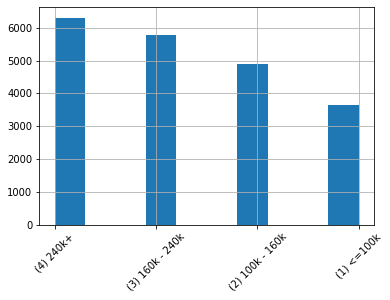

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
Y = cal_housing.target
df11 = X.copy()
df11['y'] = Y * 100000 # The raw value is in 100,000.
X_features = cal_housing.feature_names
print("X features=", X_features)
print(X.head())
# Make the multi-class target
def val_y(Y):
    if Y<=100000:
        return '(1) <=100k'
    elif Y<=160000:
        return '(2) 100k - 160k'
    elif Y<=240000:
        return '(3) 160k - 240k'
    else:
        return '(4) 240k+'
    
df11['y_class'] = df11['y'].apply(val_y)

train, test = train_test_split(df11, test_size=0.33, random_state=42)
print(df11.shape, train.shape, test.shape)

df11['y_class'].hist(xrot=45)

In [ ]:
x

In [ ]:
y

0     0
1     0
2     0
3     0
4     0
     ..
64    3
65    3
66    3
67    3
68    3
Name: type, Length: 69, dtype: int64

In [ ]:
x_features = .feature_names
print("X features=", x_features)
def val_y(y):
    if y<=0:
        return '(0) Very Bad'
    elif y<=1:
        return '(1) Bad'
    elif y<=2:
        return '(2) Good'
    else:
        return '(3) Very Good'
  
df['y_class'] = df['type'].apply(val_y)
train, test = train_test_split(df, test_size=0.33, random_state=43) 
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=545)
print(df.shape, train.shape, test.shape)


(69, 11) (46, 11) (23, 11)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [ ]:
# define the multinomial logistic regression model
# model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# define dataset
# x, y =
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1.0)
# define the model evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=3)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, x_test, y_test, scoring='accuracy',  n_jobs=-1)

# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.620 (0.240)


In [ ]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3]])

In [ ]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Reverse factorize (converting y_pred from 0s,1s and 2s to Iris-setosa, Iris-versicolor and Iris-virginica
reversefactor = dict(zip(range(3),definitions))
y_test = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual Species'], colnames=['Predicted Species']))

In [ ]:
from sklearn.linear_model import LogisticRegression

#modeling
LM_model = LogisticRegression(penalty='l2', max_iter=500, multi_class='ovr', solver='liblinear')
LM_model.fit(train[X_features],train['y_class'])

# Prediction
LM_pred_prob = pd.DataFrame(LM_model.predict_proba(test[X_features]))
LM_pred = pd.DataFrame(LM_model.predict(test[X_features]))
LM_pred = pd.concat([test.reset_index()['y_class'],LM_pred_prob,LM_pred],axis=1, ignore_index=True)
print(LM_pred.shape)

LM_pred.columns = ['Actual','(0) Very Bad', '(1) Bad','(2) Good', '(3) Very Good', 'Y_pred']
LM_pred.head()

KeyError: ignored

In [ ]:
pd.crosstab(LM_pred['Y_pred'],LM_pred['Actual']) #.apply(lambda x: x/x.sum(), axis=1)


In [ ]:
pd.crosstab(LM_pred['Y_pred'],LM_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Modeling
dt_model = DecisionTreeClassifier(random_state=0).fit(train[X_features],train['y_class'])

# Prediction
def Prediction(model):
    pred_prob = pd.DataFrame(model.predict_proba(test[X_features]))
    pred = pd.DataFrame(model.predict(test[X_features]))
    pred = pd.concat([test.reset_index()['y_class'],pred_prob,pred],axis=1, ignore_index=True)
    pred.columns = ['Actual','Y_prob (1) <=100k', 'Y_prob (2) 100k - 160k','Y_prob (3) 160k - 240k', 'Y_prob (4) 240k+', 'Y_pred']
    return(pred)
dt_pred = Prediction(dt_model)  

# Actual vs. Prediction
pd.crosstab(dt_pred['Y_pred'],dt_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Modeling
rf_model = RandomForestClassifier(max_depth=8, random_state=0).fit(train[X_features],train['y_class'])
rf_pred = Prediction(rf_model)  

# Actual vs. Prediction
pd.crosstab(rf_pred['Y_pred'],rf_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=3).fit(train[X_features],train['y_class'])
KNN_pred = Prediction(KNN_model)    
pd.crosstab(KNN_pred['Y_pred'],KNN_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

In [ ]:
def accuracy(predictions, ground_truth):
    correct_predictions = np.sum(predictions == ground_truth)
    accuracy = correct_predictions / len(ground_truth)
    return accuracy

# Example usage
predictions = [0, 1, 2, 2, 1, 0, 0, 2, 1, 2]
ground_truth = [0, 1, 2, 2, 1, 0, 0, 2, 1, 1]

acc = accuracy(predictions, ground_truth)
print("Accuracy: ", acc)


In [ ]:
(accuracy <- sum(diag(mat)) / sum(mat))
